# Task 2: Perform a data science mega case study, using the methods appropriate for the given data

## Project Description

A dataset of 768 observations on Pregnancy, Glucose, Blood Pressure, Skin Thickness, Insulin, BMI, Diabetes Pedigree Function and Age and the outcome variable with classes, positive and negative (1 and 0), has been provided for this project. The plan is to develop a practical model to accurately predict the diagnosis of a patient for diabetes accurately. We will compare different models based on three evaluation metrics, i.e., Confusion matrix, Specificity and Sensitivity and recommend the best model for predicting diabetic outcomes in pregnant patients.

## Importing Libraries and Data

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# importing encoding, model, standardisation and evaluation librabries
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

In [2]:
# Loading the dataset
dataset = pd.read_csv('diabetes-2.csv')

## Exploratory Data Analysis (EDA)

In [3]:
# Displaying the first 5 rows of the dataset
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# Understanding the shape of the dataset
print(f"Shape: {dataset.shape}")

Shape: (768, 9)


The dataset contains 768 observations, eight independent variables and one target variable.

In [5]:
# Understanding the datatypes in the dataset
# Checking the dataset for of missing values
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


The dataset contains only integer and float values. Further, there are no missing values in the dataset.

In [6]:
# Summary statistics of the dataset
dataset.describe([0.01,0.05,0.25,0.50,0.75,0.95,0.99])

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
1%,0.000000,57.000000,0.000000,0.000000,0.000000,0.000000,0.094680,21.000000,0.000000
5%,0.000000,79.000000,38.700000,0.000000,0.000000,21.800000,0.140350,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
95%,10.000000,181.000000,90.000000,44.000000,293.000000,44.395000,1.132850,58.000000,1.000000


The statistical table above shows significant differences between the 99% and max values for the SkinThickness, Insulin, and DiabetesPedigreeFunction features. These outliers will be removed in the data preprocessing stage.

The summary statistics of the dataset also show that some features (i.e., Glucose, BloodPressure, SkinThickness, Insulin, and BMI) have a minimum value of zero which seems unrealistic. This will also be worked on in the data preprocessing stage.

In [7]:
# Understanding the number of unique values in the target variable "Outcome"
dataset['Outcome'].unique()

array([1, 0], dtype=int64)

0    500
1    268
Name: Outcome, dtype: int64


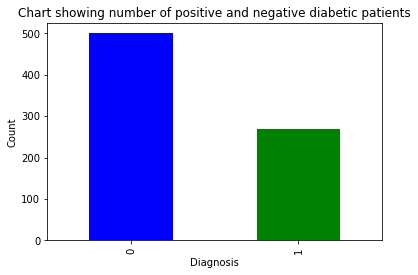

In [8]:
# Checking for the class distribution of the target variable
print(dataset['Outcome'].value_counts())

# Visualising the class distribution of the target variable
dataset['Outcome'].value_counts().plot(kind='bar', color= ['Blue', 'Green'])
plt.title('Chart showing number of positive and negative diabetic patients')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.show()

The target variable comprises only two values, i.e., 1 and 0. These values denote if a patient tested positive (1) or Negative (0) for diabetes. It is also noted that there are almost two times as many Negative patients as Positive patients in the dataset. This will be factored into the training of the machine learning model.

## Data Visualization

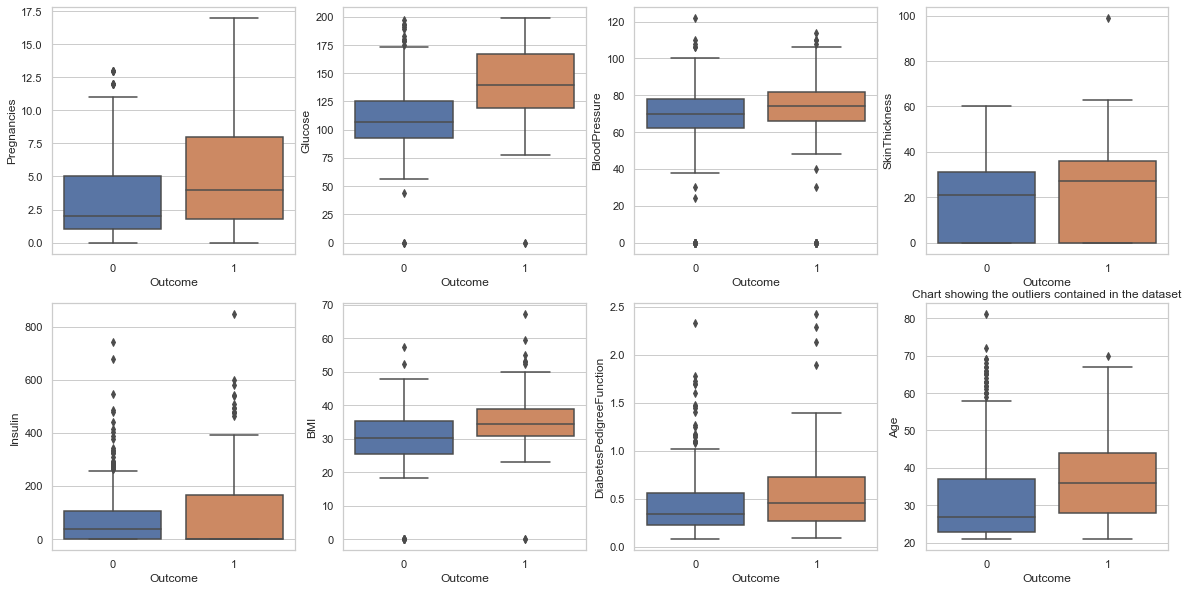

In [9]:
# Visualizing the outliers in the dataset

sns.set(style="whitegrid")
fig, axes = plt.subplots(2, 4, figsize=(20,10))
plt.title('Chart showing the outliers contained in the dataset')

#create boxplot in each subplot
sns.boxplot(data=dataset, x='Outcome', y='Pregnancies', ax=axes[0,0])
sns.boxplot(data=dataset, x='Outcome', y='Glucose', ax=axes[0,1])
sns.boxplot(data=dataset, x='Outcome', y='BloodPressure', ax=axes[0,2])
sns.boxplot(data=dataset, x='Outcome', y='SkinThickness', ax=axes[0,3])
sns.boxplot(data=dataset, x='Outcome', y='Insulin', ax=axes[1,0])
sns.boxplot(data=dataset, x='Outcome', y='BMI', ax=axes[1,1])
sns.boxplot(data=dataset, x='Outcome', y='DiabetesPedigreeFunction', ax=axes[1,2])
sns.boxplot(data=dataset, x='Outcome', y='Age', ax=axes[1,3])

plt.show()

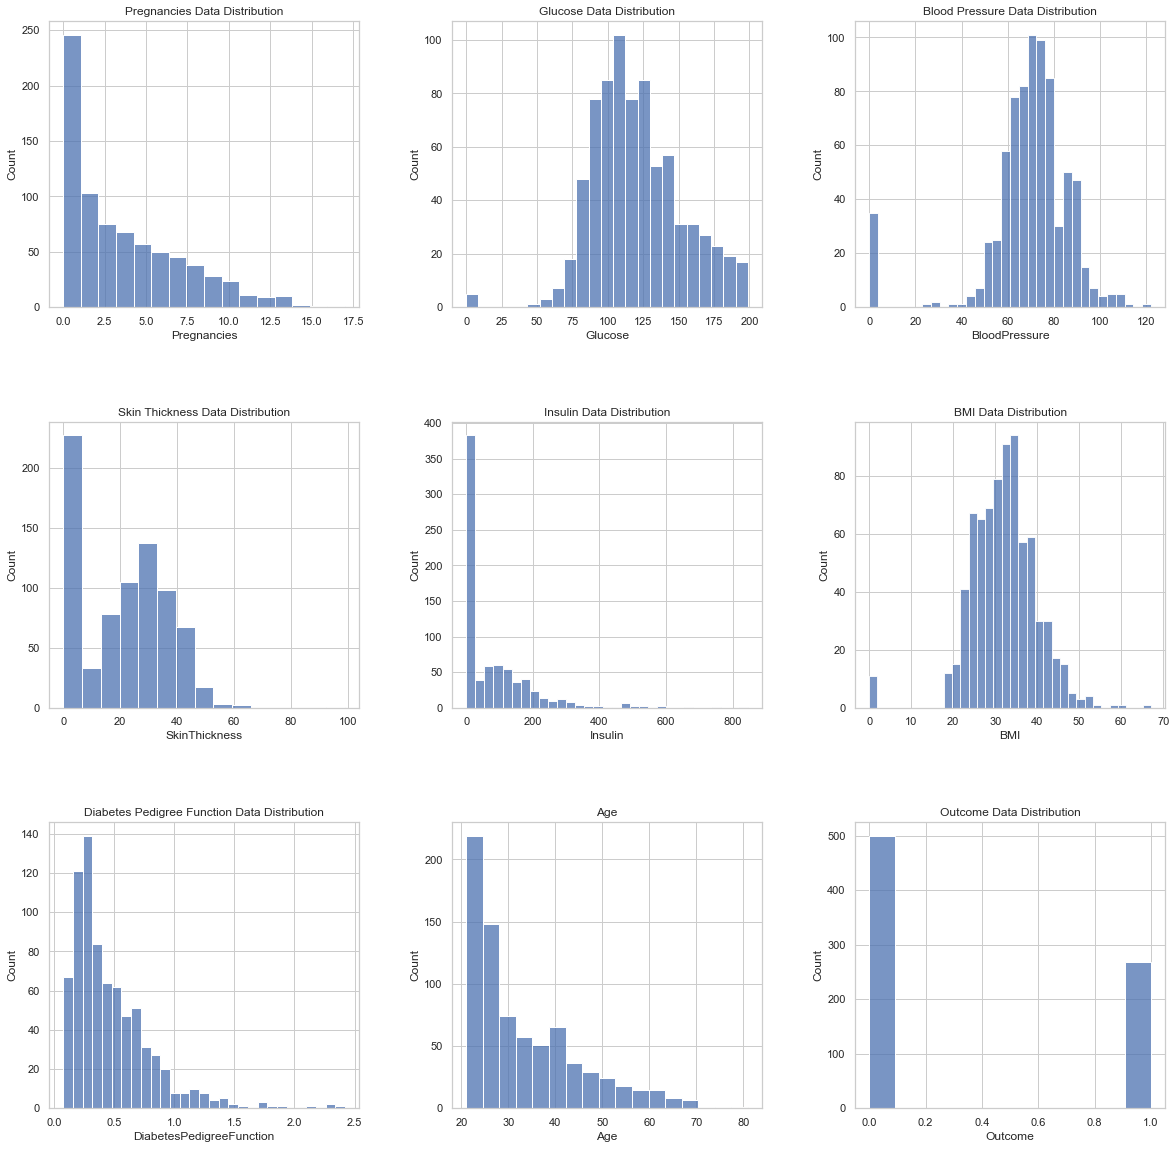

In [10]:
# Obeserving the distribution of the dataset
sns.set(style="whitegrid")
fig, axes = plt.subplots(3, 3, figsize=(20,20))

#create boxplot in each subplot
sns.histplot(data=dataset, x='Pregnancies', stat='count', ax=axes[0,0])
sns.histplot(data=dataset, x='Glucose', stat='count', ax=axes[0,1])
sns.histplot(data=dataset, x='BloodPressure', stat='count', ax=axes[0,2])
sns.histplot(data=dataset, x='SkinThickness', stat='count', ax=axes[1,0])
sns.histplot(data=dataset, x='Insulin', stat='count', ax=axes[1,1])
sns.histplot(data=dataset, x='BMI', stat='count', ax=axes[1,2])
sns.histplot(data=dataset, x='DiabetesPedigreeFunction', stat='count', ax=axes[2,0])
sns.histplot(data=dataset, x='Age', stat='count', ax=axes[2,1])
sns.histplot(data=dataset, x='Outcome', stat='count', ax=axes[2,2])

# set titles and labels for each subplot
axes[0,0].set_title('Pregnancies Data Distribution')
axes[0,1].set_title('Glucose Data Distribution')
axes[0,2].set_title('Blood Pressure Data Distribution')
axes[1,0].set_title('Skin Thickness Data Distribution')
axes[1,1].set_title('Insulin Data Distribution')
axes[1,2].set_title('BMI Data Distribution')
axes[2,0].set_title('Diabetes Pedigree Function Data Distribution')
axes[2,1].set_title('Age')
axes[2,2].set_title('Outcome Data Distribution')

# adjust subplot spacing
plt.subplots_adjust(hspace=0.4, wspace=0.3)

# display the plot
plt.show()

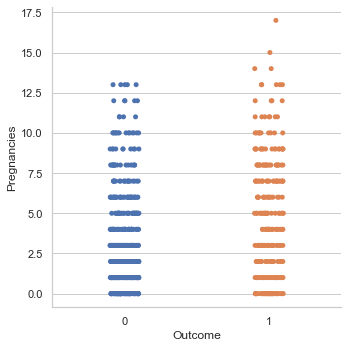

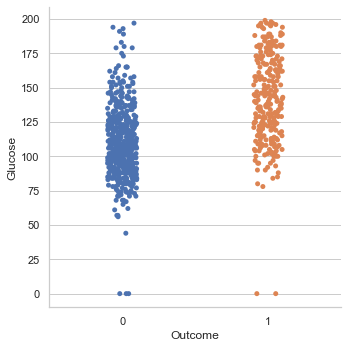

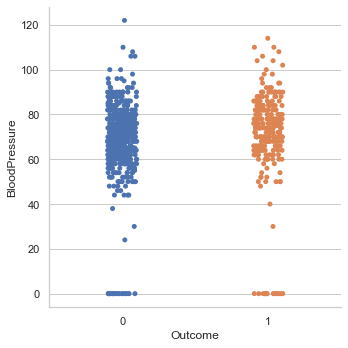

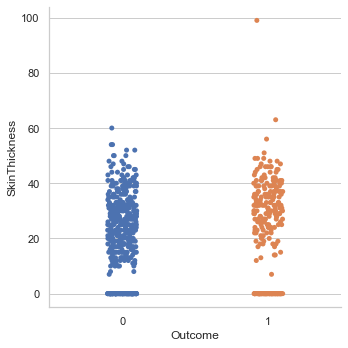

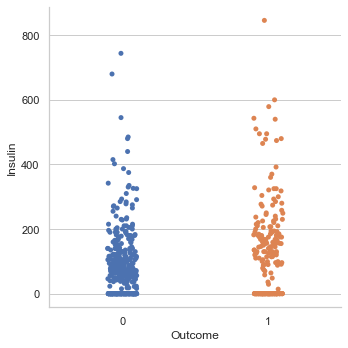

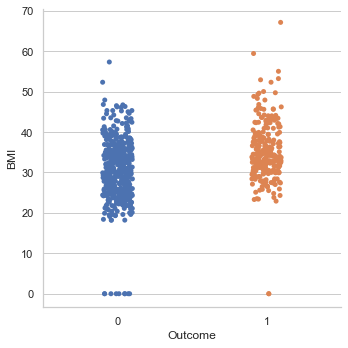

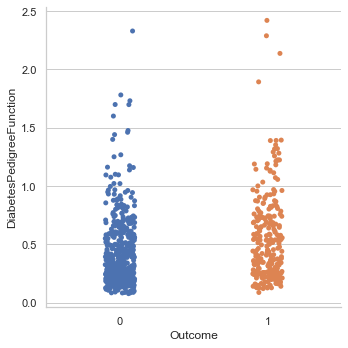

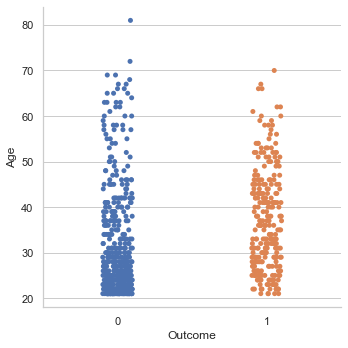

In [11]:
# Observing each feature in the dataset in relation to the target variable 'Outcome'
for column in dataset.columns:
    if column != 'Outcome':
        sns.catplot(data=dataset, x='Outcome', y=column, hue='Outcome')

## Data Preprocessing

In [12]:
# Replacing zero values in relevant features with NaN values
dataset.iloc[:, 1:6] = dataset.iloc[:, 1:6].replace(0, np.NaN)

# Checking the number of missing values in each feature
print(f"Check for missing values: \n{dataset.isna().sum()}")

# Replacing missing values with the mean value of each feature
dataset.fillna(dataset.groupby('Outcome').transform('mean'), inplace=True)

# Confirming that there are no missing values in the dataset
print(f"\nConfirm missing values have been replaced with mean: \n{dataset.isna().sum()}")

Check for missing values: 
Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

Confirm missing values have been replaced with mean: 
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


As stated earlier, having zero as a minimum for Glucose, BloodPressure, SkinThickness, Insulin, and BMI is not realistic. Therefore, in this step, all zero values in the relevant features are replaced with NaN, and then the NaN is replaced with the mean value of each feature categorised by the target variable 'Outcome'. This way, the zeros would not hurt the performance of our machine-learning models by skewing them in any particular way.

In [13]:
# Removing Outliers from our Dataset using the Z-Score method
z_scores = (dataset - dataset.mean()) / dataset.std()
filtered_entries = ((z_scores > -3) & (z_scores < 3)).all(axis=1)
dataset = dataset[filtered_entries]

The outliers in the dataset are removed using the Z Score method. All observations with values above or below three standard deviations from the mean of each feature have been removed from the dataset.

In [14]:
# Checking the summary statistics of the dataset to confirm that outliers have been removed
dataset.describe([0.01,0.05,0.25,0.50,0.75,0.95,0.99])

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000
mean,3.837500,120.074404,72.305465,28.856321,147.871076,32.120182,0.449136,32.905556,0.336111
std,3.278451,29.653585,11.334650,8.322545,63.681543,6.481561,0.282602,11.310486,0.472706
min,0.000000,44.000000,38.000000,7.000000,15.000000,18.200000,0.078000,21.000000,0.000000
1%,0.000000,67.190000,48.000000,10.000000,29.570000,19.500000,0.092760,21.000000,0.000000
5%,0.000000,79.950000,54.000000,14.000000,50.000000,22.195000,0.140000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,25.000000,120.000000,27.400000,0.242500,24.000000,0.000000
50%,3.000000,115.000000,72.000000,28.000000,130.287879,32.000000,0.363000,29.000000,0.000000
75%,6.000000,138.000000,80.000000,33.000000,206.846154,36.100000,0.600000,40.000000,1.000000
95%,10.000000,180.000000,90.000000,43.000000,255.150000,43.620000,1.022600,57.000000,1.000000


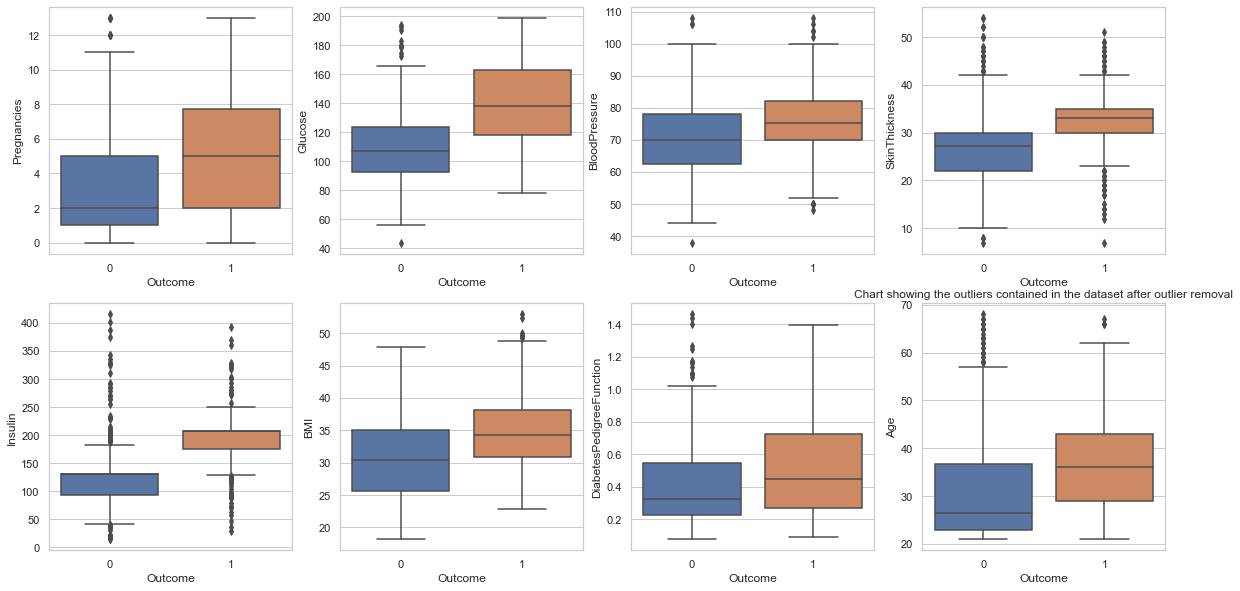

In [15]:
# Visualizing the outliers in the dataset

sns.set(style="whitegrid")
fig, axes = plt.subplots(2, 4, figsize=(20,10))
plt.title('Chart showing the outliers contained in the dataset after outlier removal')

#create boxplot in each subplot
sns.boxplot(data=dataset, x='Outcome', y='Pregnancies', ax=axes[0,0])
sns.boxplot(data=dataset, x='Outcome', y='Glucose', ax=axes[0,1])
sns.boxplot(data=dataset, x='Outcome', y='BloodPressure', ax=axes[0,2])
sns.boxplot(data=dataset, x='Outcome', y='SkinThickness', ax=axes[0,3])
sns.boxplot(data=dataset, x='Outcome', y='Insulin', ax=axes[1,0])
sns.boxplot(data=dataset, x='Outcome', y='BMI', ax=axes[1,1])
sns.boxplot(data=dataset, x='Outcome', y='DiabetesPedigreeFunction', ax=axes[1,2])
sns.boxplot(data=dataset, x='Outcome', y='Age', ax=axes[1,3])

plt.show()

0    478
1    242
Name: Outcome, dtype: int64


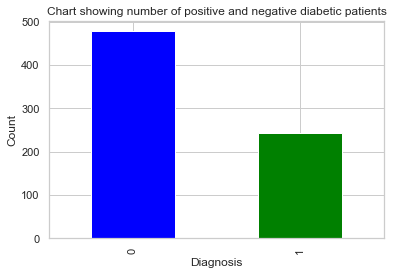

In [16]:
# Checking for the class distribution of the target variable
print(dataset['Outcome'].value_counts())

# Visualising the class distribution of the target variable
dataset['Outcome'].value_counts().plot(kind='bar', color= ['Blue', 'Green'])
plt.title('Chart showing number of positive and negative diabetic patients')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.savefig('Figure 2')
plt.show()

The statistical table above shows that most outliers have been removed from the dataset. Further, the dataset is now made up of 720 rather than 768 observations in the original dataset.

Lastly, it is also noted that there are still almost twice as many negative patients as positive patients in the dataset. Again, this will be factored into the training of the machine learning model.

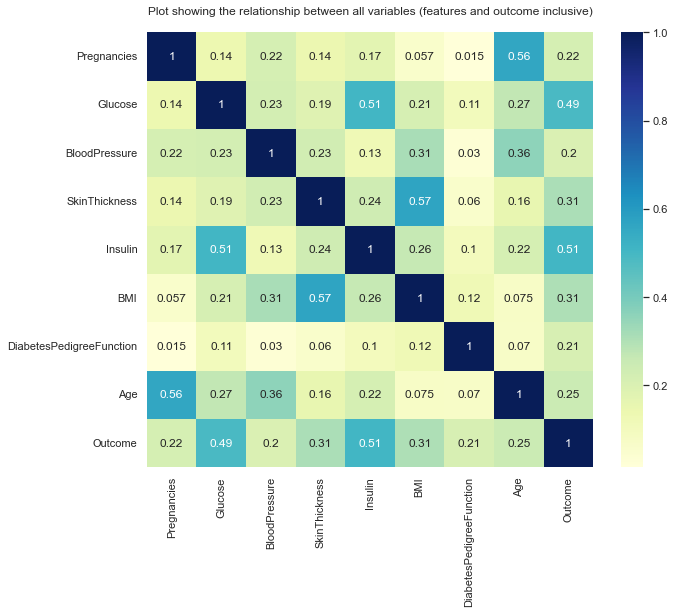

In [17]:
# Correlation matrix
corr_mat = dataset.corr()

# Heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr_mat, annot=True, cmap='YlGnBu')
plt.title('Plot showing the relationship between all variables (features and outcome inclusive)\n')
plt.savefig('Figure 3')
plt.show()

The correlation matrix above shows that Glucose and Insulin levels has a higher impact on the likelihood of a patient testing positive or negative for diabetes.

### Feature Selection and Engineering

New features will be created based on the following information related to the domain in which this project exists.

**1. Glucose Tolerance Test**

- Normal Results for Gestational Diabetes:
Two-hour glucose level less than 120 mg/dL

- Abnormal Results for Gestational Diabetes
Two-hour glucose level greater than 120 mg/dL

Source: Stumvoll, M., Mitrakou, A., Pimenta, W., Jenssen, T., Yki-Järvinen, H., Van Haeften, T., Renn, W. and Gerich, J., 2000. Use of the oral glucose tolerance test to assess insulin release and insulin sensitivity. Diabetes Care, 23(3), pp.295–301. https://doi.org/10.2337/diacare.23.3.295.

In [18]:
# creating a new feature to highlight the categories of Glucose levels as stated above
dataset['Glucose_Class'] = ['Normal' if x<120 else 'Abnormal' for x in dataset['Glucose']]

In [19]:
# viewing 5 random observations of the dataset to confirm the addition of the new BP_Class feature
dataset.sample(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Glucose_Class
616,6,117.0,96.0,27.235457,130.287879,28.7,0.157,30,0,Normal
122,2,107.0,74.0,30.000000,100.000000,33.6,0.404,23,0,Normal
715,7,187.0,50.0,33.000000,392.000000,33.9,0.826,34,1,Abnormal
387,8,105.0,100.0,36.000000,206.846154,43.3,0.239,45,1,Normal
543,4,84.0,90.0,23.000000,56.000000,39.5,0.159,25,0,Normal


**2. Blood Pressure**

According to the American Heart Association, Blood Pressure falls into the following categories:

- Normal: Systolic below 120 and diastolic below 80

- Elevated: Systolic 120–129 and diastolic below 80

- Hypertension stage 1: Systolic 130–139 and diastolic 80–89

- Hypertension stage 2: Systolic above 140 and diastolic 90 and above

- Hypertensive crisis: Systolic above 180 and diastolic above 120.

Source: https://www.heart.org/en/health-topics/high-blood-pressure/understanding-blood-pressure-readings

In [20]:
# creating a new feature to highlight the categories of BloodPressure levels as stated above
dataset['BP_Class'] = ['Normal' if x<80 else 'HS1' if ((x>=80) & (x<90)) else 'HS2' if ((x>=90) & (x<120)) else 'HC' for x in dataset['BloodPressure']]

In [21]:
# viewing 5 random observations of the dataset to confirm the addition of the new BP_Class feature
dataset.sample(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Glucose_Class,BP_Class
681,0,162.0,76.0,36.000000,206.846154,49.6,0.364,26,1,Abnormal,Normal
382,1,109.0,60.0,8.000000,182.000000,25.4,0.947,21,0,Normal,Normal
314,7,109.0,80.0,31.000000,206.846154,35.9,1.127,43,1,Normal,HS1
729,2,92.0,52.0,27.235457,130.287879,30.1,0.141,22,0,Normal,Normal
717,10,94.0,72.0,18.000000,130.287879,23.1,0.595,56,0,Normal,Normal


**3. BMI**

According to the National Health Service (NHS), BMI falls into the following categories:

- below 18.5 – Underweight
- between 18.5 and 24.9 – Normal Weight
- between 25 and 29.9 – Overweight
- 30 or over – Obese

Source: https://www.nhs.uk/common-health-questions/lifestyle/what-is-the-body-mass-index-bmi/

In [22]:
# creating a new feature to highlight the categories of BMI as stated above
dataset['BMI_Class'] = ['Underweight' if x<18.5 else 'Normal Weight' if ((x>=18.5) & (x<=24.9)) else 'Overweight' if ((x>=25) & (x<=29.9)) else 'Obese' for x in dataset['BMI']]

In [23]:
# viewing 5 random observations of the dataset to confirm the addition of the new BMI_Class feature
dataset.sample(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Glucose_Class,BP_Class,BMI_Class
132,3,170.0,64.0,37.000000,225.000000,34.5,0.356,30,1,Abnormal,Normal,Obese
746,1,147.0,94.0,41.000000,206.846154,49.3,0.358,27,1,Abnormal,HS2,Obese
46,1,146.0,56.0,27.235457,130.287879,29.7,0.564,29,0,Abnormal,Normal,Overweight
736,0,126.0,86.0,27.000000,120.000000,27.4,0.515,21,0,Abnormal,HS1,Overweight
526,1,97.0,64.0,19.000000,82.000000,18.2,0.299,21,0,Normal,Normal,Underweight


In [24]:
# selecting the X and y variables for model training and test
y = dataset['Outcome'].values
X = dataset.drop(['Glucose', 'BloodPressure', 'BMI','Outcome'], axis=1).values

In [25]:
print(X)

[[6 35.0 206.84615384615384 ... 'Abnormal' 'Normal' 'Obese']
 [1 29.0 130.28787878787878 ... 'Normal' 'Normal' 'Overweight']
 [8 33.0 206.84615384615384 ... 'Abnormal' 'Normal' 'Normal Weight']
 ...
 [5 23.0 112.0 ... 'Abnormal' 'Normal' 'Overweight']
 [1 33.0 206.84615384615384 ... 'Abnormal' 'Normal' 'Obese']
 [1 31.0 130.28787878787878 ... 'Normal' 'Normal' 'Obese']]


In [26]:
print(y)

[1 0 1 0 0 1 0 1 0 1 0 1 1 1 1 1 0 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0 0 1 1 1 0
 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0
 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 1 1 1 0 0 0 0 0
 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0
 1 1 0 0 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 1 1 1 1 0 0 1 1 0 1 0 1 1 1 0 0 0
 0 0 0 1 1 0 1 0 0 0 1 1 1 1 0 1 1 1 0 0 0 0 0 1 0 1 1 0 0 0 1 1 1 1 0 0 0
 1 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0
 1 0 0 1 1 0 1 0 0 0 1 1 1 0 0 1 0 0 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1 0
 1 0 1 1 1 0 0 1 0 1 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1
 1 0 1 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 1 0
 1 0 1 1 0 1 0 1 0 1 0 1 0 0 0 0 1 0 1 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1
 0 0 0 0 1 0 0 1 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1
 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0
 1 1 0 0 0 0 0 0 1 0 0 0 

In [27]:
# transforming the categorical feature variables to numerical feature variables
ct = ColumnTransformer(transformers = [('encoder', OneHotEncoder(), [5,6,7])], remainder = 'passthrough')
X = ct.fit_transform(X)
X = np.array(X)

In [28]:
print(X)

[[1.0 0.0 0.0 ... 206.84615384615384 0.627 50]
 [0.0 1.0 0.0 ... 130.28787878787878 0.351 31]
 [1.0 0.0 0.0 ... 206.84615384615384 0.672 32]
 ...
 [1.0 0.0 0.0 ... 112.0 0.245 30]
 [1.0 0.0 0.0 ... 206.84615384615384 0.349 47]
 [0.0 1.0 0.0 ... 130.28787878787878 0.315 23]]


## Model Development

The data is split in an 80:20 ratio, with 80% of the data being the train set and 20% being the test set.

As observed earlier, there are almost two times as many Negative patients as Positive patients in the dataset. Therefore, the stratify parameter has been set to the Outcome variable to preserve the class distribution of Negative and Positive patient data in training and testing the machine learning model.

Standardising the data using the Standard Scalar function ensures that all features are within the same number range, i.e., 1 to -1. This will prevent the machine learning model from being skewed in favour of any particular feature.

The random state of the models is set to 1 to ensure that the randomness of our models does not change while an optimal solution for predicting the diabetic outcome of patients is developed.

Further, the random state for the KNN model has not been set because this model does not have a random state argument.

### K Nearest Neighbours

In [29]:
# Spliting X and y data into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 1, stratify=y)

# Standardizing the training and testing sets
stand_scaler = StandardScaler()
X_train = stand_scaler.fit_transform(X_train)
X_test = stand_scaler.transform(X_test)

# initiating the classifier
KNN_clf = KNeighborsClassifier()

# fitting training data to the model
KNN_clf.fit(X_train, y_train)

# Generate confusion matrix
y_pred = KNN_clf.predict(X_test)
con_mat = confusion_matrix(y_test, y_pred)

# Calculate the specificity and sensitivity performance metrics from the confusion matrix
specificity_1 = con_mat[0,0]/(con_mat[0,0]+con_mat[0,1])
sensitivity_1 = con_mat[1,1]/(con_mat[1,1]+con_mat[1,0])

### Support Vector Classification (SVC)

In [30]:
# Spliting X and y data into Train and Test sets
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X, y, test_size= 0.2, random_state= 1, stratify=y)

# Standardizing the training and testing sets
stand_scaler = StandardScaler()
X_train_2 = stand_scaler.fit_transform(X_train_2)
X_test_2 = stand_scaler.transform(X_test_2)

# initiating the classifier
SVC_clf = SVC(random_state=1)

# fitting training data to the model
SVC_clf.fit(X_train_2, y_train_2)

# Generate confusion matrix
y_pred_2 = SVC_clf.predict(X_test_2)
con_mat_2 = confusion_matrix(y_test_2, y_pred_2)

# Calculate the specificity and sensitivity performance metrics from the confusion matrix
specificity_2 = con_mat_2[0,0]/(con_mat_2[0,0]+con_mat_2[0,1])
sensitivity_2 = con_mat_2[1,1]/(con_mat_2[1,1]+con_mat_2[1,0])

### Random Forest

In [31]:
# Spliting X and y data into Train and Test sets
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X, y, test_size= 0.2, random_state= 1, stratify=y)

# Standardizing the training and testing sets
stand_scaler = StandardScaler()
X_train_3 = stand_scaler.fit_transform(X_train_3)
X_test_3 = stand_scaler.transform(X_test_3)

# initiating the classifier
RF_clf = RandomForestClassifier(random_state=1)

# fitting training data to the model
RF_clf.fit(X_train_3, y_train_3)

# Generate confusion matrix
y_pred_3 = RF_clf.predict(X_test_3)
con_mat_3 = confusion_matrix(y_test_3, y_pred_3)

# Calculate the specificity and sensitivity performance metrics from the confusion matrix
specificity_3 = con_mat_3[0,0]/(con_mat_3[0,0]+con_mat_3[0,1])
sensitivity_3 = con_mat_3[1,1]/(con_mat_3[1,1]+con_mat_3[1,0])

### Logistic Regression

In [32]:
# Spliting X and y data into Train and Test sets
X_train_4, X_test_4, y_train_4, y_test_4 = train_test_split(X, y, test_size= 0.2, random_state= 1, stratify=y)

# Standardizing the training and testing sets
stand_scaler = StandardScaler()
X_train_4 = stand_scaler.fit_transform(X_train_4)
X_test_4 = stand_scaler.transform(X_test_4)

# initiating the classifier
Log_clf = LogisticRegression(random_state=1)

# fitting training data to the model
Log_clf.fit(X_train_4, y_train_4)

# Generate confusion matrix
y_pred_4 = Log_clf.predict(X_test_4)
con_mat_4 = confusion_matrix(y_test_4, y_pred_4)

# Calculate the specificity and sensitivity performance metrics from the confusion matrix
specificity_4 = con_mat_4[0,0]/(con_mat_4[0,0]+con_mat_4[0,1])
sensitivity_4 = con_mat_4[1,1]/(con_mat_4[1,1]+con_mat_4[1,0])

## Evaluation

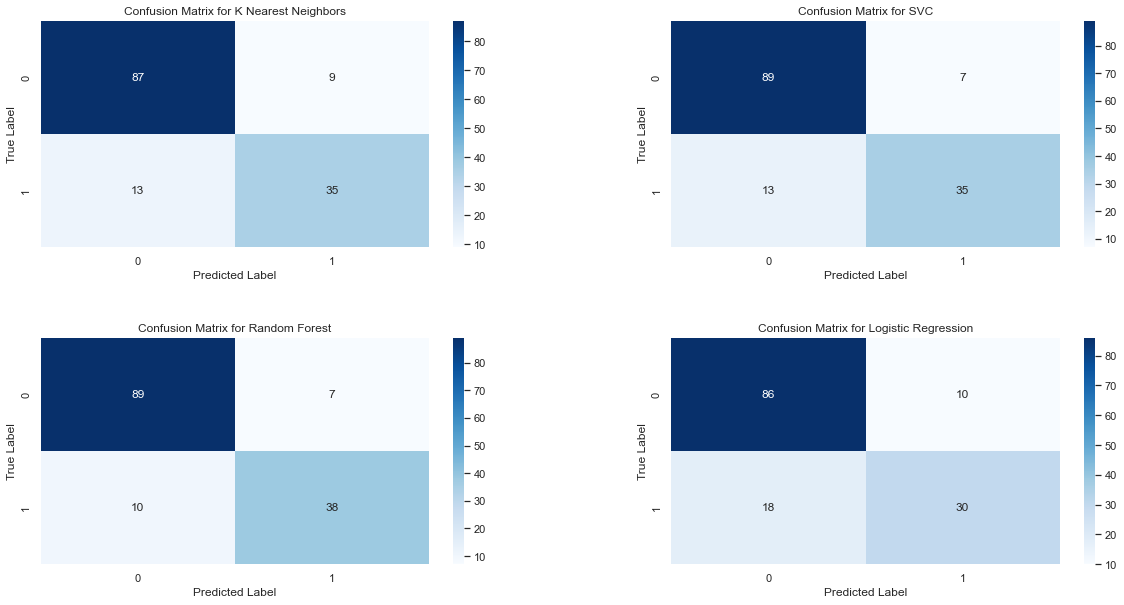

In [33]:
# Visualizing the evaluation metrics of each trained and tested model

sns.set(style="whitegrid")
fig, axes = plt.subplots(2, 2, figsize=(20,10))

# plot confusion matrix using sns heatmap in each subplot
sns.heatmap(con_mat, annot=True, cmap='Blues', ax=axes[0,0])
sns.heatmap(con_mat_2, annot=True, cmap='Blues', ax=axes[0,1])
sns.heatmap(con_mat_3, annot=True, cmap='Blues', ax=axes[1,0])
sns.heatmap(con_mat_4, annot=True, cmap='Blues', ax=axes[1,1])

# set titles and labels for each subplot
axes[0,0].set_title('Confusion Matrix for K Nearest Neighbors')
axes[0,0].set_xlabel('Predicted Label')
axes[0,0].set_ylabel('True Label')

axes[0,1].set_title('Confusion Matrix for SVC')
axes[0,1].set_xlabel('Predicted Label')
axes[0,1].set_ylabel('True Label')

axes[1,0].set_title('Confusion Matrix for Random Forest')
axes[1,0].set_xlabel('Predicted Label')
axes[1,0].set_ylabel('True Label')

axes[1,1].set_title('Confusion Matrix for Logistic Regression')
axes[1,1].set_xlabel('Predicted Label')
axes[1,1].set_ylabel('True Label')

# adjust subplot spacing
plt.subplots_adjust(hspace=0.4, wspace=0.3)

# display the plot
plt.show()

In [34]:
# create dictionary with evalutation metrics
evalutation_scores = {
    'model_name': np.array(['K Nearest Neighbours', 'SVC', 'Random Forest', 'Logistic Regression']),
    'specificity_scores': np.array([specificity_1, specificity_2, specificity_3, specificity_4]),
    'sensitivity_scores': np.array([sensitivity_1, sensitivity_2, sensitivity_3, sensitivity_4])        
}

# create a DataFrame from the evalutation_scores dictionary
evalutation_metrics = pd.DataFrame(evalutation_scores)

In [35]:
evalutation_metrics

,model_name,specificity_scores,sensitivity_scores
0,K Nearest Neighbours,0.906250,0.729167
1,SVC,0.927083,0.729167
2,Random Forest,0.927083,0.791667
3,Logistic Regression,0.895833,0.625000


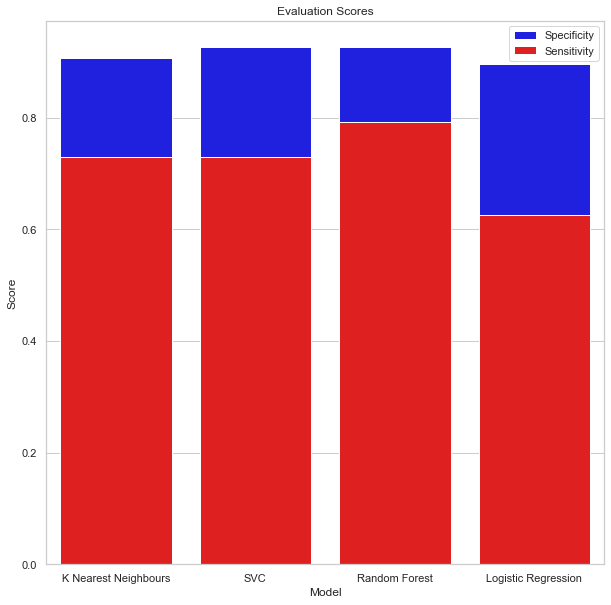

In [36]:
# visualising each model's evaluation metrics
# set the plot size
plt.figure(figsize=(10,10))

# set the plot style
sns.set(style="whitegrid")

# create the bar plot for evalutation_metrics
sns.barplot(x="model_name", y="specificity_scores", data=evalutation_metrics, color="blue", label="Specificity")
sns.barplot(x="model_name", y="sensitivity_scores", data=evalutation_metrics, color="red", label="Sensitivity")

# set the title and axes labels
plt.title("Evaluation Scores")
plt.xlabel("Model")
plt.ylabel("Score")

# add a legend
plt.legend()

# show the plot
plt.show()

The Random Forest model is the best model to implement a solution for predicting a patient's outcome being positive or negative for diabetes, given the input features used in training this model.

According to the Specificity metrics of the model, the model will accurately predict that a patient has tested negative for diabetes 92.70% of the time and accurately predict that a patient has tested positive for diabetes 79.17% of the time.

Further, hyperparameter tuning using GridSearchCV or other techniques can be used to improve model performance. Though Random Forest has been chosen as the best model for implementing the diabetes prediction solution, it must be noted that this model is prone to overfitting. More work would have to be done in future iterations to tune the hyperparameters of the Random Forest model to ensure that it performs well while reducing overfitting.